In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt
import dask.dataframe as dd
import numpy as np

In [2]:
# Load the dataset with pandas
df = pd.read_csv('train_set.csv')

In [21]:
# Convert the pandas dataframe to a datatable frame
datatable_df = dt.Frame(df)

# Sample 80% of the data
# rows = np.random.choice(a = datatable_df.nrows, size = int(datatable_df.nrows * 0.8), replace = False)
# datatable_df = datatable_df[rows, :]

# Convert the datatable frame to a dask dataframe
df = dd.from_pandas(datatable_df.to_pandas(), npartitions=4)

In [22]:
# Convert 'checkin' to datetime format
df['checkin'] = dd.to_datetime(df['checkin'])

# Extract month, season, and day of the week
df['month'] = df['checkin'].dt.month
df['season'] = df['checkin'].dt.month % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall
df['day_of_week'] = df['checkin'].dt.dayofweek

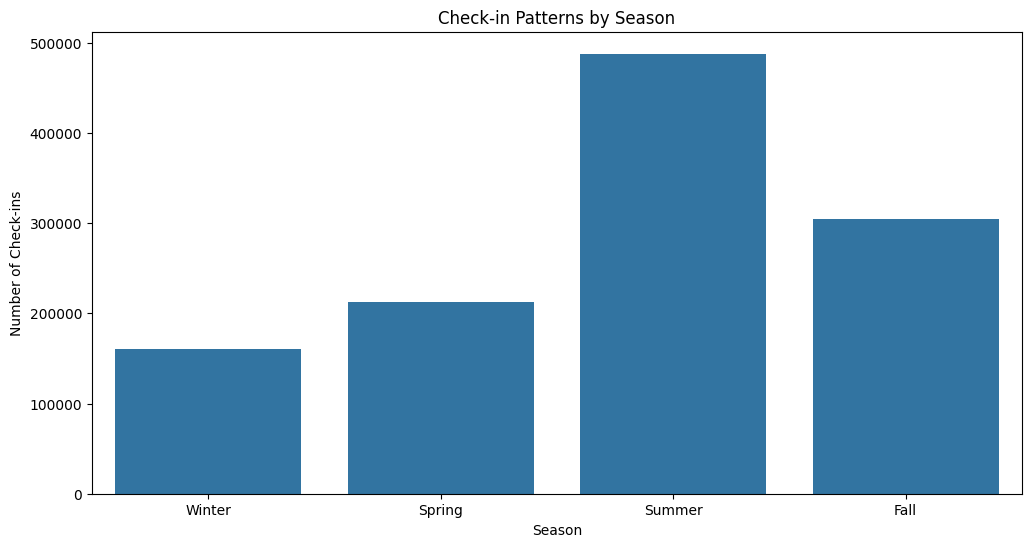

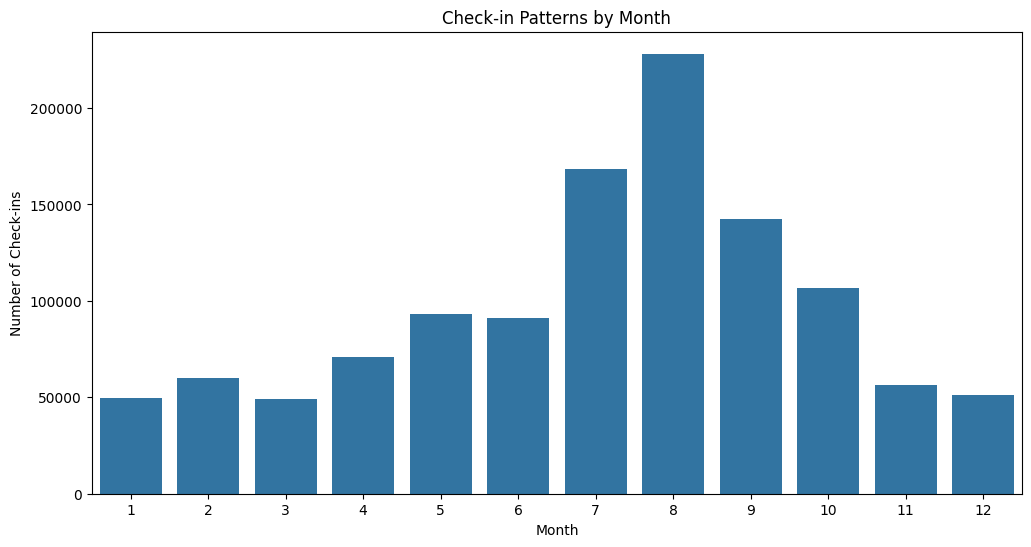

In [23]:
# Compute the count of check-ins per season
season_counts = df['season'].value_counts().compute()

# Create a pandas dataframe for plotting
season_df = pd.DataFrame({'Season': season_counts.index, 'Number of Check-ins': season_counts.values})

# Visualize seasonal check-in patterns
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Number of Check-ins', data=season_df)
plt.title('Check-in Patterns by Season')
plt.xlabel('Season')
plt.ylabel('Number of Check-ins')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

# Compute the count of check-ins per month
month_counts = df['month'].value_counts().compute()
month_df = pd.DataFrame({'Month': month_counts.index, 'Number of Check-ins': month_counts.values})

# Visualize monthly check-in patterns
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Number of Check-ins', data=month_df)
plt.title('Check-in Patterns by Month')
plt.xlabel('Month')
plt.ylabel('Number of Check-ins')
plt.show()

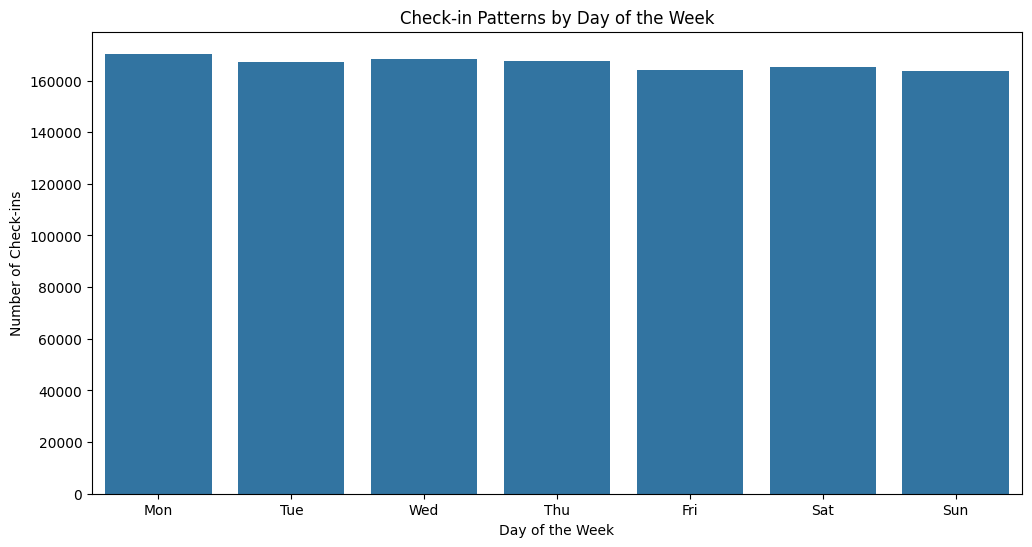

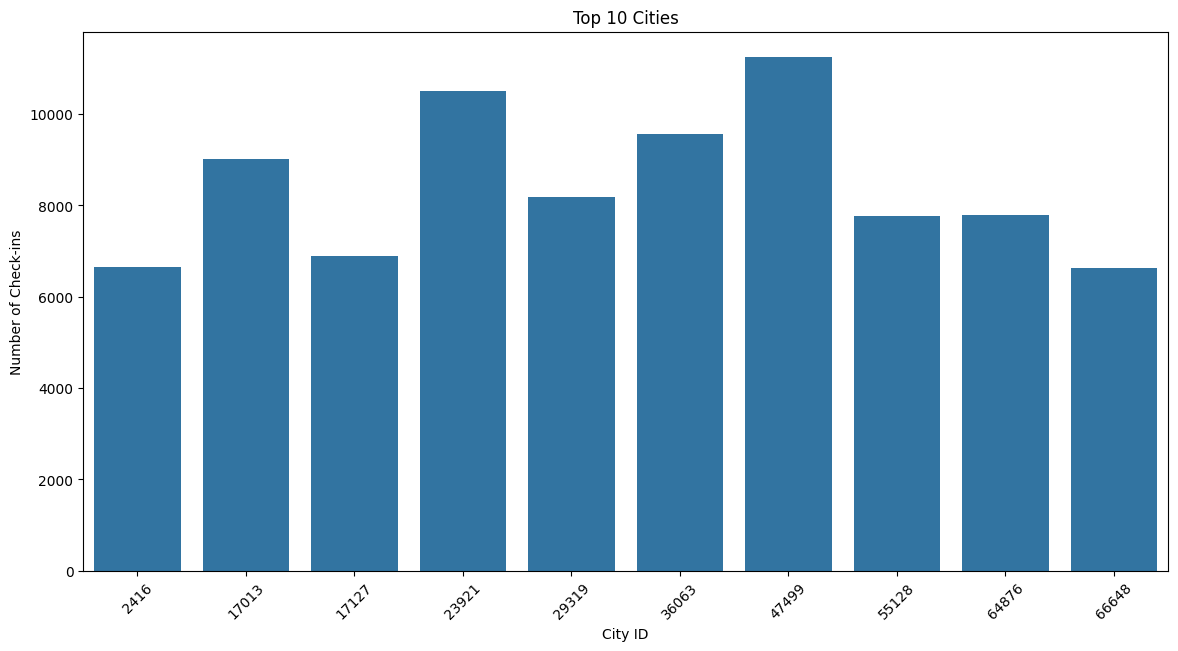

In [24]:
# Compute the count of check-ins per day of the week
day_counts = df['day_of_week'].value_counts().compute()
day_df = pd.DataFrame({'Day of the Week': day_counts.index, 'Number of Check-ins': day_counts.values})

# Visualize check-in patterns by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='Day of the Week', y='Number of Check-ins', data=day_df)
plt.title('Check-in Patterns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Check-ins')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Compute the count of check-ins per city
city_counts = df['city_id'].value_counts().nlargest(10).compute()
city_df = pd.DataFrame({'City ID': city_counts.index, 'Number of Check-ins': city_counts.values})

# Top cities
plt.figure(figsize=(14, 7))
sns.barplot(x='City ID', y='Number of Check-ins', data=city_df)
plt.title('Top 10 Cities')
plt.xlabel('City ID')
plt.ylabel('Number of Check-ins')
plt.xticks(rotation=45)
plt.show()


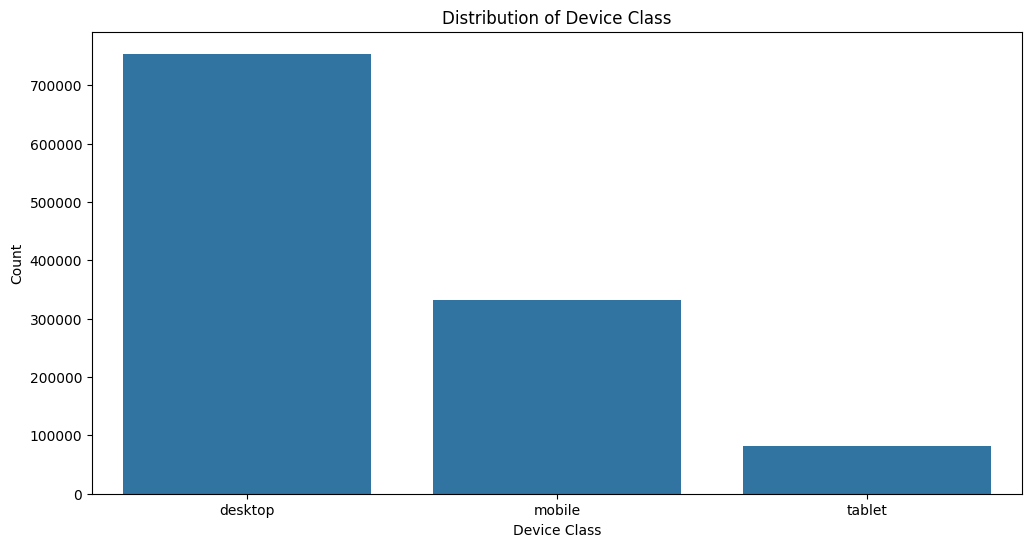

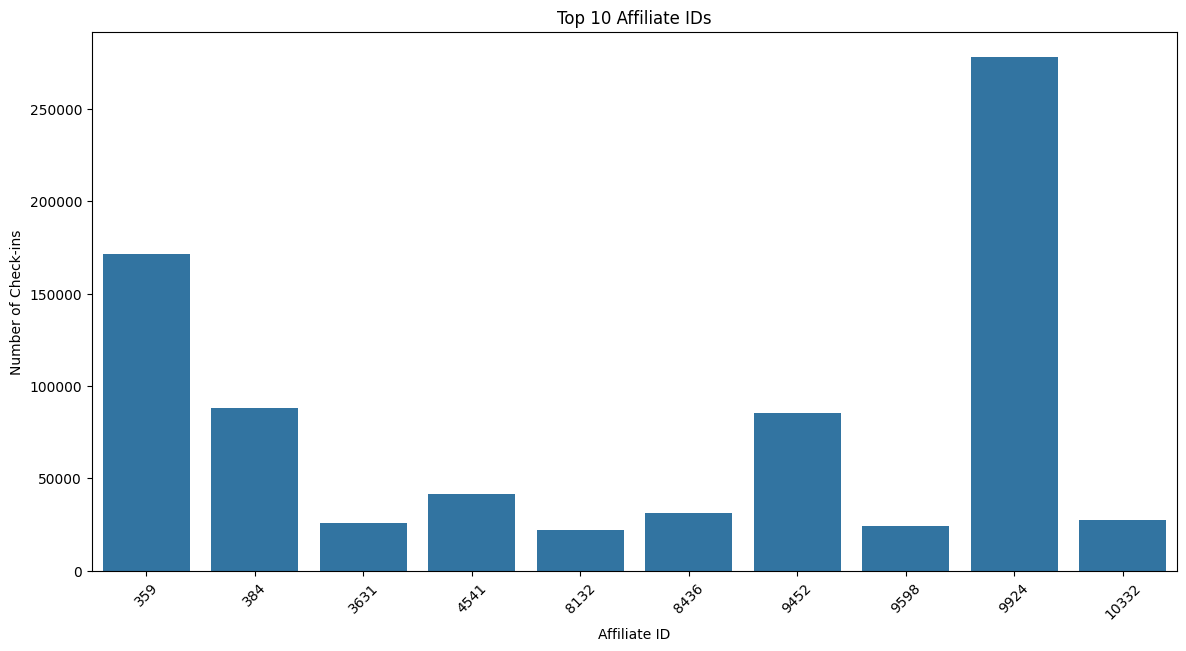

In [25]:
# Compute the count of check-ins per device class
device_counts = df['device_class'].value_counts().compute()
device_df = pd.DataFrame({'Device Class': device_counts.index, 'Count': device_counts.values})

# Device class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Device Class', y='Count', data=device_df)
plt.title('Distribution of Device Class')
plt.xlabel('Device Class')
plt.ylabel('Count')
plt.show()

# Compute the count of check-ins per affiliate ID
affiliate_counts = df['affiliate_id'].value_counts().nlargest(10).compute()
affiliate_df = pd.DataFrame({'Affiliate ID': affiliate_counts.index, 'Number of Check-ins': affiliate_counts.values})

# Affiliate ID distribution
plt.figure(figsize=(14, 7))
sns.barplot(x='Affiliate ID', y='Number of Check-ins', data=affiliate_df)
plt.title('Top 10 Affiliate IDs')
plt.xlabel('Affiliate ID')
plt.ylabel('Number of Check-ins')
plt.xticks(rotation=45)
plt.show()